<a href="https://colab.research.google.com/github/Kaviarasan25/Linear-Regression/blob/main/Learning_of_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Basic Linear regression Model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('student_scores.csv')
data

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Plotiing using between feauture and target variable**

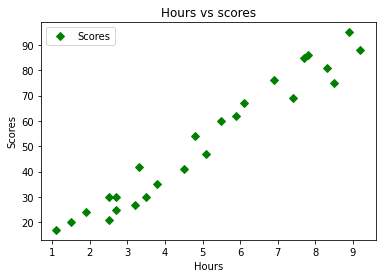

In [ ]:
data.plot(x='Hours',y='Scores',style='D',color='g')
plt.title('Hours vs scores')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.show()

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**By plotting and also checking the correlation, we can conclude that These two feautures has a good linear relationship.
We can go ahead with Linear regression. No transformation required.**

# **# Preparing the data:**

In [ ]:
#dataset.iloc[row_criteria,column_criteria]  

X=data.iloc[:,:-1].values # select all rows and select all columns except the last column as my feature
Y=data.iloc[:,1].values # target as arrays

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1) # hERE TEST SIZE REFERS 20% DATA GOES TO TEST,80% OF DATA GOES TO TRAIN AND, random state is get the same result whenever we want to Get same result

In [31]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

### Normlising/Scaling the data

In [32]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [34]:
X_train

array([[ 1.02324308],
       [ 0.34531806],
       [ 0.89613214],
       [-0.7563101 ],
       [-0.88342105],
       [-1.09527262],
       [ 1.65879779],
       [ 0.09109617],
       [-0.62919916],
       [-0.07838508],
       [-1.18001324],
       [-1.18001324],
       [ 1.53168685],
       [ 1.0656134 ],
       [ 0.68428057],
       [-1.09527262],
       [ 1.27746496],
       [-0.33260696],
       [ 0.26057743],
       [-1.60371638]])

### Model:

In [ ]:
#Model for algorithm - score = (m * hours) + c

In [35]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [36]:
print(regressor.intercept_) # c

53.75


In [37]:
print(regressor.coef_) # the final learnt model is predictedScore = 9.91 * hoursStudied + 2.01


# predicted score  = 10.15 * (hours) + 1.08

[24.68971155]


In [38]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


## Metric

In [40]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8421031525243527


### Multiple Linear Regression

In [41]:
dataset = pd.read_csv('petrol_consumption.csv')

In [43]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [42]:

dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [44]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [45]:
dataset.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [46]:
dataset.shape

(48, 5)

In [47]:
dataset['Petrol_tax'].unique()

array([ 9.  ,  7.5 ,  8.  , 10.  ,  7.  ,  8.5 ,  6.58,  5.  ,  6.  ])

## EDA

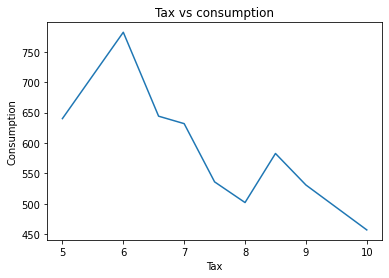

In [48]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

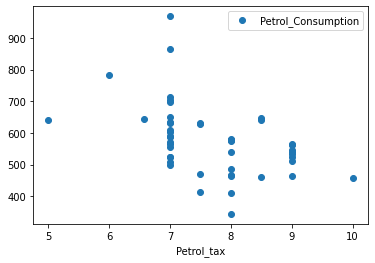

In [49]:
dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')

In [50]:
dataset[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


1) There is a linear relationship between tax and consumption
2) As tax increases, comsumption decreases which is in-line with our GK
3) No transformation required


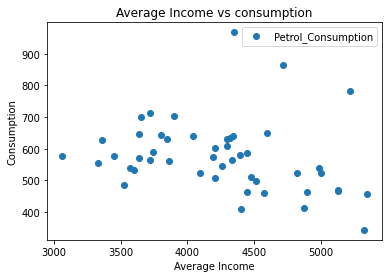

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [51]:
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
dataset[['Average_income','Petrol_Consumption']].corr()

1) There is a low linear relationshp between the data 
2) No transformation reqd
3) The direction of relatiohsnip is not in-line with our GK

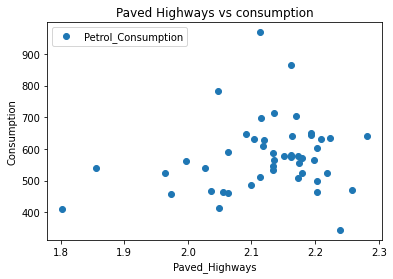

,transformed,Petrol_Consumption
transformed,1.000000,0.183696
Petrol_Consumption,0.183696,1.000000


In [52]:
dataset['transformed'] = np.log(np.log((dataset['Paved_Highways'])))
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

1) There is low correlation bettwen log transformed feature and the target - can be considered for Linear regression

In [54]:
dataset['cosPaved_Highways']  = np.cos(dataset['Paved_Highways'])

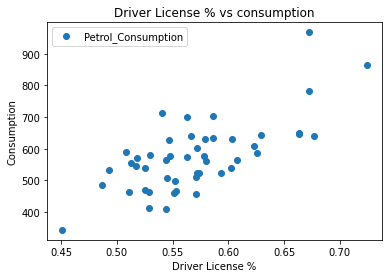

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [55]:

dataset.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

1) High correlation between the data 2) No transformation reqd

In [56]:
X = dataset[['Petrol_tax', 'Average_income', 'cosPaved_Highways',
       'Population_Driver_licence(%)']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [60]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
# petrol_consumption = -31 *petrol_tax + -35 * avg_income + (-16 * cos(paved_highways)) + 76 * pop_driver + 583

,Coefficient
Petrol_tax,-31.231233
Average_income,-35.914308
LogPaved_Highways,-16.300708
Population_Driver_licence(%),76.191361


In [61]:
regressor.intercept_ # c 

583.9736842105262

In [62]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,534,458.312893
1,410,543.384902
2,577,597.829998
3,571,549.779595
4,577,670.631338
5,704,639.912024
6,487,505.750822
7,587,672.828251
8,467,491.750432
9,580,502.573445


In [63]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.11930323920155983


### Feature Selection

## RFE

In [64]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],selector.support_))

[('Petrol_tax', True),
 ('Average_income', True),
 ('LogPaved_Highways', False),
 ('Population_Driver_licence(%)', True)]

## Sequential Feature selection

In [65]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],sfs.get_support())))

[('Petrol_tax', False), ('Average_income', True), ('LogPaved_Highways', False), ('Population_Driver_licence(%)', True)]


In [66]:
list(zip([1,2,3],['a','b','c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [67]:
X_trans = sfs.transform(X)
X_trans # feature selection

array([[3.571e+03, 5.250e-01],
       [4.092e+03, 5.720e-01],
       [3.865e+03, 5.800e-01],
       [4.870e+03, 5.290e-01],
       [4.399e+03, 5.440e-01],
       [5.342e+03, 5.710e-01],
       [5.319e+03, 4.510e-01],
       [5.126e+03, 5.530e-01],
       [4.447e+03, 5.290e-01],
       [4.512e+03, 5.520e-01],
       [4.391e+03, 5.300e-01],
       [5.126e+03, 5.250e-01],
       [4.817e+03, 5.740e-01],
       [4.207e+03, 5.450e-01],
       [4.332e+03, 6.080e-01],
       [4.318e+03, 5.860e-01],
       [4.206e+03, 5.720e-01],
       [3.718e+03, 5.400e-01],
       [4.716e+03, 7.240e-01],
       [4.341e+03, 6.770e-01],
       [4.593e+03, 6.630e-01],
       [4.983e+03, 6.020e-01],
       [4.897e+03, 5.110e-01],
       [4.258e+03, 5.170e-01],
       [4.574e+03, 5.510e-01],
       [3.721e+03, 5.440e-01],
       [3.448e+03, 5.480e-01],
       [3.846e+03, 5.790e-01],
       [4.188e+03, 5.630e-01],
       [3.601e+03, 4.930e-01],
       [3.640e+03, 5.180e-01],
       [3.333e+03, 5.130e-01],
       [

## Cross Validation

In [68]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [69]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

-0.18938278864918115

## Ridge Regression

In [70]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

Alpha :  0.001 0.17405172676558195 0.6808971519353071
Alpha :  0.002 0.17477128833876912 0.680894985811011
Alpha :  0.003 0.17548302267658128 0.6808913899256781
Alpha :  0.005 0.17688326544236654 0.6808799551294784
Alpha :  0.01 0.1802513054988603 0.6808271454864974
Alpha :  0.02 0.1864446537825968 0.6806223286669912
Alpha :  0.03 0.1919609999271115 0.6802937495009929
Alpha :  0.04 0.19685177357546482 0.6798508280864244
Alpha :  0.1 0.21541064995831416 0.675227559533371
Alpha :  0.2 0.21845189891550726 0.662522018279142
Alpha :  0.5 0.14285113903952268 0.6110255402189522
Alpha :  1 -0.031953454860303765 0.5264339465322669


### Custom Loss Function

In [ ]:
eta_init -> parameter
X -> fts
y -> target
ypred ->  matmul of beta_init and X = np.matmul(X,beta)
loss -> mean(abs(y - y_pred)) = np.mean(np.abs(y - np.matmul(X,beta)))

In [ ]:
#Gradient descent to find the params that minimze the loss function

from scipy.optimize import minimize
import numpy as np
#minimize - given a function, it will try to find the params that makes the function the lowest value


# np.matmul(X,np.square(beta)) = prediceted = x * beta
# mae = mean(abs(predicted - trueVal))
# np.square(beta)

# we will write our own loss function
# my model is ypred = m^2 * x + c^2
# my loss function is MSE loss funcition =>
# my loss function is np.mean((Y - np.matmul(X,np.square(beta))))
#beta stores the values of the parameters : beta[0]  will be m and beta[1] will be c
# ypred = (np.square(beta[0]) * X) + (np.square(beta[1]) * 1)
#mse = np.mean(np.square(ypred - y))

#I am trying to find the value of m (beta) that minimises my below loss function
def objective_function(beta, X, Y): #Loss Function
    #X = np.c_[X,np.ones(X.shape[0])]
    error = np.mean(np.square(((np.square(beta[0]) * X) + (np.square(beta[1]) * 1)) - Y)) 
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([2,5]) # initiate the model with a random value

#code for doing gradient descent
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500}) #syntax for doing gradient descent

# result
# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x # score = 9.75 * hoursStudies
print(beta_hat)

In [ ]:
from scipy.optimize import minimize
# y = mx + c 
def objective_function(beta, X, Y):
    b = np.ones((X.shape[0],X.shape[1]+1))
    b[:,:-1] = X
    error = np.mean(np.abs(np.matmul(b,beta) - Y))
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([1,1])
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500})

# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x
print(beta_hat)

# **Effect of Outlier**

In [ ]:
X_train_outlier = np.vstack([X_train,scaler.transform([[24]])])
y_train_outlier = np.append(y_train,100)

plt.scatter(X_train_outlier, y_train_outlier)



regressor = LinearRegression()
regressor.fit(X_train_outlier, y_train_outlier)
y_pred = regressor.predict(X_test)
# print(y_pred)
# print(y_test)
print(regressor.coef_[0],regressor.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 :', np.sqrt(metrics.r2_score(y_test, y_pred)))

In [ ]:
#Gradient descent to find the params that minimze the loss function

from scipy.optimize import minimize

# np.matmul(X,np.square(beta)) = prediceted = x * beta
# mae = mean(abs(predicted - trueVal))
# np.square(beta)

#I am trying to find the value of m (beta) that minimises my below loss function
def objective_function(beta, X, Y): #Loss Function
    X = np.c_[X,np.ones(X.shape[0])]
    error = np.mean(np.abs(np.matmul(X,beta) - Y)) # average of absolute value of (predicted - trueLabel)
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([6,5]) # initiate the model with a random value

#code for doing gradient descent
result = minimize(objective_function, beta_init, args=(X_train_outlier,y_train_outlier),
                  method='BFGS', options={'maxiter': 500}) #syntax for doing gradient descent

# result
# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x # score = 10.6 * hoursStudies
print(beta_hat)